In [2]:
!nvidia-smi

Thu Mar 13 12:33:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.03             Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P3             13W /   68W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%%time
import cudf

higgs_train = cudf.read_csv("higgs_train.csv")
display(higgs_train.head())
display(higgs_train.shape)


,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,0.697082,-0.958439,1.275488,0.778051,0.302126,1.893155,0.159402,-0.728394,0.0,...,-0.333590,1.297778,0.000000,0.937236,1.002013,0.986881,0.749515,0.720236,1.051694,0.981158
1,0.0,1.183154,-0.029273,-1.298064,0.327250,0.471964,1.145090,0.594113,0.615517,0.0,...,0.571689,-1.066808,0.000000,1.304430,0.805267,0.988135,0.679024,0.986679,0.920275,0.813513
2,0.0,0.929137,-0.627290,-0.859169,0.971635,-1.391404,0.993663,0.655507,-0.257726,0.0,...,-0.854937,0.245665,3.101961,0.900343,1.116289,0.976522,0.906496,0.893914,1.028973,1.027449
3,1.0,0.332894,0.691464,-0.388644,1.290443,-0.782801,0.543689,-1.228901,1.524139,0.0,...,-0.676713,-1.305420,0.000000,0.787490,1.818032,0.990046,1.297726,1.010942,1.576281,1.331579
4,0.0,1.697409,0.633026,0.055903,0.874309,0.724028,0.725621,0.198021,-1.143621,0.0,...,1.766790,-1.237166,0.000000,1.356383,0.842175,0.989696,0.743065,0.454114,0.686371,0.799645


(7333333, 29)

CPU times: user 3.98 s, sys: 1.42 s, total: 5.4 s
Wall time: 11.1 s


In [4]:
%%time
import cudf

higgs_test = cudf.read_csv("higgs_test.csv")
display(higgs_test.head())
display(higgs_test.shape)


,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
1,1.0,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
2,0.0,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3,0.0,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
4,1.0,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339


(3666667, 29)

CPU times: user 1.48 s, sys: 366 ms, total: 1.85 s
Wall time: 7.93 s


# RF without PCA

'Original Training Data (First 5 Rows):'

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,jet2_pt,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.697082,-0.958439,1.275488,0.778051,0.302126,1.893155,0.159402,-0.728394,0.0,1.208925,...,-0.333590,1.297778,0.000000,0.937236,1.002013,0.986881,0.749515,0.720236,1.051694,0.981158
1,1.183154,-0.029273,-1.298064,0.327250,0.471964,1.145090,0.594113,0.615517,0.0,0.820135,...,0.571689,-1.066808,0.000000,1.304430,0.805267,0.988135,0.679024,0.986679,0.920275,0.813513
2,0.929137,-0.627290,-0.859169,0.971635,-1.391404,0.993663,0.655507,-0.257726,0.0,0.823913,...,-0.854937,0.245665,3.101961,0.900343,1.116289,0.976522,0.906496,0.893914,1.028973,1.027449
3,0.332894,0.691464,-0.388644,1.290443,-0.782801,0.543689,-1.228901,1.524139,0.0,1.707755,...,-0.676713,-1.305420,0.000000,0.787490,1.818032,0.990046,1.297726,1.010942,1.576281,1.331579
4,1.697409,0.633026,0.055903,0.874309,0.724028,0.725621,0.198021,-1.143621,0.0,0.697254,...,1.766790,-1.237166,0.000000,1.356383,0.842175,0.989696,0.743065,0.454114,0.686371,0.799645


'Original Test Data (First 5 Rows):'

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,jet2_pt,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.138683,-0.726635,-0.005790,0.204118,0.153842,1.585904,-0.045576,-1.448527,1.086538,1.598471,...,-2.439800,0.073642,0.000000,1.790497,1.730592,0.980587,0.743065,2.378752,1.534863,1.227558
1,0.404633,1.014821,-1.050041,1.136441,-1.403536,3.218436,-1.944837,0.801788,0.000000,2.238942,...,-1.174742,-0.912542,0.000000,1.072789,0.649697,0.981147,2.004577,0.521853,1.246037,1.461494
2,1.137585,0.325251,1.453598,0.804114,0.893516,0.418095,-1.164536,-0.585919,0.000000,0.653565,...,0.280201,-0.982461,3.101961,0.816500,0.933867,0.988956,0.852772,0.415455,0.737194,0.691437
3,1.380438,-0.595149,-0.727112,0.465392,-0.057453,0.399224,-0.076273,1.080084,2.173076,0.644878,...,1.261267,1.129085,0.000000,0.563342,0.857068,0.992465,0.875139,0.512037,0.686362,0.887047
4,0.962628,1.191110,-1.161568,1.541759,0.569159,1.337374,0.810973,0.458075,1.086538,0.549946,...,0.413452,1.309431,3.101961,1.596246,1.146864,1.687726,1.178736,0.925320,1.094308,0.991339


'Test Accuracy: 0.7248'

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70   1723315
         1.0       0.73      0.76      0.75   1943352

    accuracy                           0.72   3666667
   macro avg       0.72      0.72      0.72   3666667
weighted avg       0.72      0.72      0.72   3666667



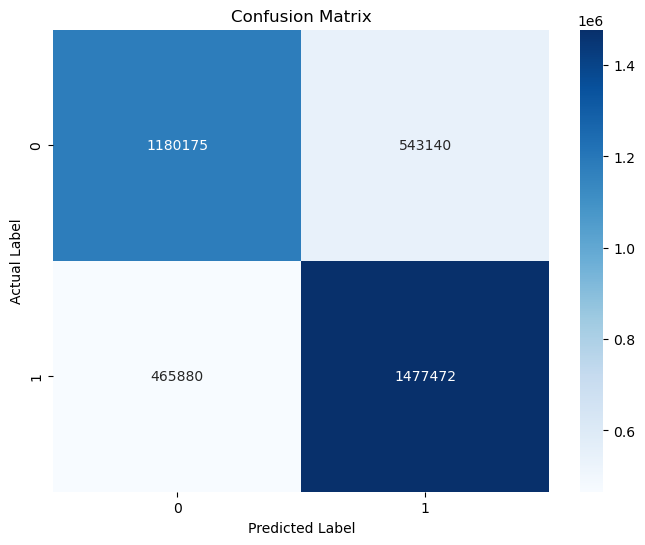

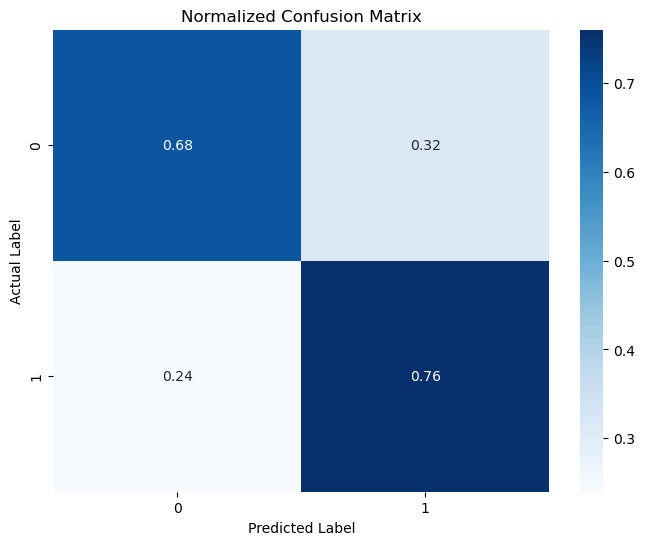

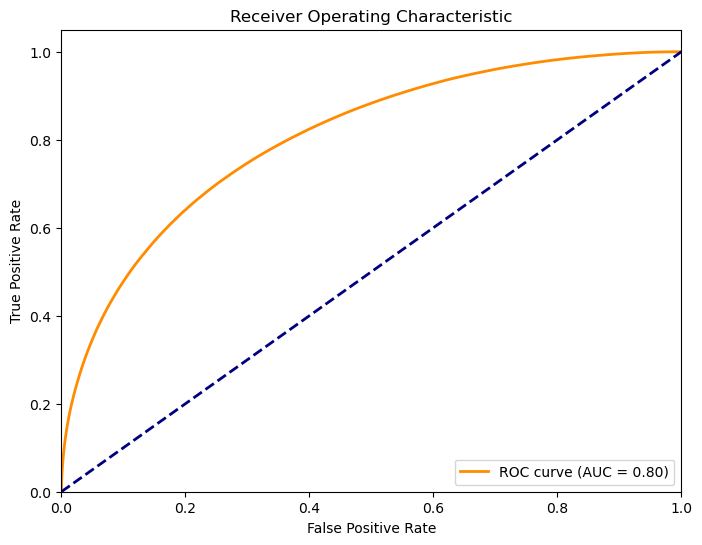

CPU times: user 12min 29s, sys: 12min 10s, total: 24min 40s
Wall time: 8min 11s


In [ ]:
%%time
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Separate features and target variable for both training and test datasets
X_train = higgs_train.drop('class_label', axis=1)
y_train = higgs_train['class_label']

X_test = higgs_test.drop('class_label', axis=1)
y_test = higgs_test['class_label']

# Display original data samples
display("Original Training Data (First 5 Rows):", X_train.head())
display("Original Test Data (First 5 Rows):", X_test.head())

# Initialize and train Random Forest classifier on original data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# n_estimators (default = 100):
# split_criterion (default = 0 or 'gini'):
# bootstrap (default = True):
# max_samples (default = 1.0):
# max_depth (default = 16):
# max_leaves (default = -1):
# max_features (default = ‘sqrt’):

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(f"Test Accuracy: {accuracy:.4f}")

# ----------------------------
# Additional Metrics
# ----------------------------
# Convert predictions and true labels to pandas (if they are cudf)
y_test_pd = y_test.to_pandas() if hasattr(y_test, "to_pandas") else y_test
y_pred_pd = y_pred.to_pandas() if hasattr(y_pred, "to_pandas") else y_pred

# Classification report (includes precision, recall, and f1 score per class)
print("Classification Report:")
print(classification_report(y_test_pd, y_pred_pd))

# Confusion Matrix
cm = confusion_matrix(y_test_pd, y_pred_pd)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Normalize the confusion matrix by row (actual class totals)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# ----------------------------
# ROC-AUC Computation and Plotting
# ----------------------------
# Get predicted probabilities from the model on original data
y_proba = rf.predict_proba(X_test)

# Convert to a pandas DataFrame if necessary
if hasattr(y_proba, "to_pandas"):
    y_proba = y_proba.to_pandas()

# Assuming binary classification, extract probabilities for the positive class
y_score = y_proba.iloc[:, 1]

# Ensure y_test is in pandas format
if hasattr(y_test, "to_pandas"):
    y_test_pd = y_test.to_pandas()
else:
    y_test_pd = y_test

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test_pd, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# RF with PCA

'Principal Components:'

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000534,0.000761,0.000395,-0.002727,-0.000088,-0.000249,0.000932,-0.001441,0.142731,0.007433,...,0.000258,0.000342,-0.905654,-0.054661,-0.011471,0.000428,0.022749,0.080932,0.018531,0.003340
1,-0.000119,-0.478145,-0.001755,0.000082,0.000961,0.000099,-0.477945,0.001066,0.000296,0.000149,...,-0.371934,0.000032,-0.001864,-0.000328,-0.000002,-0.000011,-0.000075,0.000167,-0.000049,-0.000044
2,0.003357,-0.000368,-0.000206,0.010786,0.001022,-0.000957,0.000164,-0.002793,-0.386023,-0.015863,...,-0.000844,0.000159,0.152185,0.086114,0.035751,-0.000110,-0.029651,-0.096311,-0.018094,0.004383
3,-0.001098,-0.000095,-0.001259,-0.014014,0.001946,-0.012775,-0.000442,-0.000207,0.689877,-0.098763,...,-0.000526,0.000682,-0.012002,-0.071769,-0.040035,-0.000553,0.012303,0.024621,-0.008119,-0.020136
4,0.000335,-0.000493,0.286613,0.000097,0.315656,0.000605,-0.000728,-0.802219,0.001404,0.000683,...,-0.000387,0.063359,0.000746,0.000085,0.000181,0.000023,0.000457,0.001102,0.000581,0.000372
5,0.000288,-0.000493,0.598067,-0.000029,0.239156,0.000093,-0.000437,-0.050307,-0.001732,0.000341,...,0.000766,0.044676,0.000593,0.000986,0.000469,-0.000084,-0.000007,-0.000352,0.000242,0.000320
6,0.000487,0.000472,-0.422921,0.000278,0.069369,0.000552,-0.000105,-0.108233,-0.000873,0.001213,...,0.001158,-0.077188,0.001400,0.000959,0.000462,0.000143,0.000260,0.000657,0.000610,0.000467
7,-0.000121,-0.003590,0.400655,0.000101,-0.338088,-0.000024,0.000176,0.065356,0.001376,-0.000330,...,0.004957,-0.804382,0.000178,0.000012,0.000038,-0.000115,-0.000101,-0.000176,0.000033,0.000016
8,-0.000042,0.002583,-0.251594,0.000360,0.786211,0.000082,0.000526,0.141706,-0.000458,0.000292,...,-0.003344,-0.501768,-0.000629,0.000043,0.000189,0.000108,-0.000072,0.000517,0.000233,0.000184
9,-0.000173,-0.173910,-0.003351,-0.000390,0.004899,-0.001383,-0.065163,0.000509,-0.000766,-0.001630,...,0.905814,0.002796,-0.000486,-0.003755,-0.002088,0.000003,-0.000989,-0.001603,-0.001946,-0.001508


'Explained Variance Ratio:'

0     0.115804
1     0.096613
2     0.084537
3     0.070003
4     0.064147
5     0.056528
6     0.055591
7     0.054488
8     0.052914
9     0.044697
10    0.042461
11    0.041074
12    0.038854
13    0.037743
14    0.025546
15    0.021808
16    0.019789
17    0.018530
18    0.016477
dtype: float64

'Transformed Training Data (First 5 Rows):'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class_label
0,0.423231,0.264321,-0.643367,-0.787670,1.572628,-0.143283,-1.456574,-0.590595,-0.697940,-0.167445,0.093973,-0.339921,0.390510,-1.160617,0.895484,0.192493,0.329069,1.254080,0.249672,0.0
1,1.492539,-0.158296,1.012961,-1.484376,-0.991848,-0.035312,1.669457,0.283653,1.106843,0.541972,0.459618,0.696986,-0.881965,0.103645,-0.304975,-0.625521,0.304609,-0.558016,-0.037882,0.0
2,-1.717813,1.534402,2.400808,0.011422,0.099160,-1.475563,1.252420,0.378252,-1.352847,-0.151551,0.025108,0.347508,-1.845302,-0.088702,0.093069,0.353526,0.116500,-0.438541,-0.285868,0.0
3,1.507306,1.308650,1.051349,-1.630615,-1.198995,-1.330700,0.146319,1.521706,0.262532,-0.208545,-0.543404,-0.580899,0.017652,1.397984,0.670819,0.366945,-0.427718,-0.253761,-0.743368,1.0
4,1.430374,-1.685829,1.095129,-1.501218,1.694249,-0.431833,1.548265,1.244994,0.620920,1.084123,0.697794,0.520532,0.468252,0.320185,0.351882,-0.713247,0.023044,-0.390473,0.573051,0.0


'Transformed Test Data (First 5 Rows):'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class_label
0,0.918230,1.032162,-1.510037,-0.909378,1.415408,0.136222,1.270472,0.062212,-0.391748,-2.203555,-1.382577,-0.222801,0.163664,-0.845964,-0.217314,-0.625544,0.758352,-0.263801,-0.392153,0.0
1,0.670038,0.883936,-0.959430,-1.733144,-1.973478,-0.184707,0.132823,0.504058,-0.130016,-1.090857,-1.385833,-0.578456,1.240859,1.577950,-1.408999,1.276136,0.339407,0.931693,0.105409,1.0
2,-1.809312,-0.309626,2.390646,0.055004,1.103146,0.922810,-0.843267,0.963664,0.842508,-0.019628,0.842915,-0.011320,1.455359,0.492754,0.136680,0.001881,0.177837,-0.307792,-0.146659,0.0
3,0.938045,-0.735247,-1.889167,0.032770,-1.094863,-0.801246,-1.347988,-1.377598,0.060612,0.817309,0.948895,1.315865,0.617593,-0.382408,0.165979,-0.620537,0.230137,-0.375269,0.114606,0.0
4,-2.443964,-2.446113,-0.091322,0.721748,-1.171544,0.581368,-0.120293,-2.165668,0.381352,-0.385031,-0.492695,-1.313585,0.915770,-0.430799,-0.672917,-0.014382,-0.507889,0.235776,0.386147,1.0


'Test Accuracy: 0.6574'

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.51      0.58   1723315
         1.0       0.64      0.79      0.71   1943352

    accuracy                           0.66   3666667
   macro avg       0.66      0.65      0.65   3666667
weighted avg       0.66      0.66      0.65   3666667



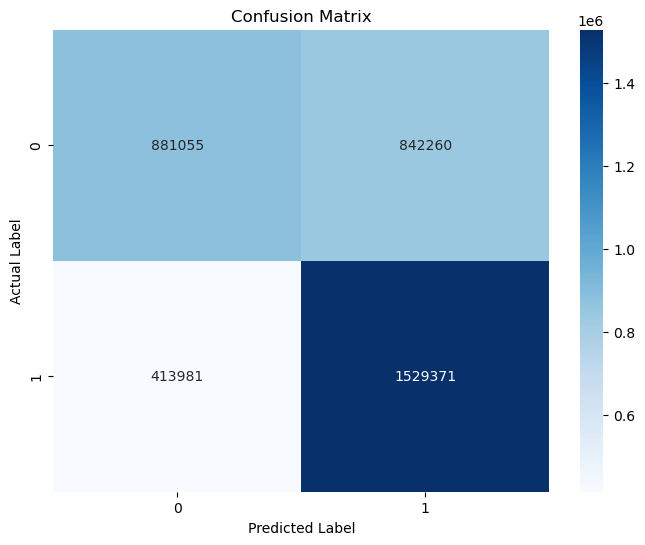

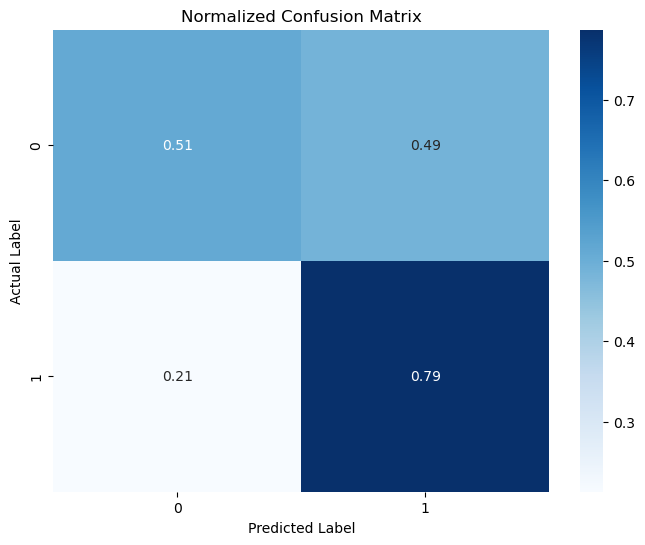

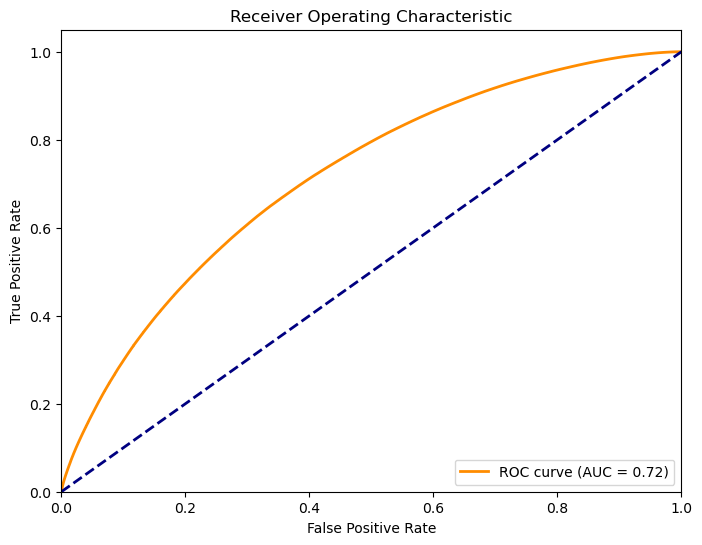

CPU times: user 19min 19s, sys: 17min 21s, total: 36min 41s
Wall time: 11min 37s


In [5]:
%%time
# Import necessary libraries
from cuml import PCA
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score
from IPython.display import display

# Additional imports for metrics and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Separate features and target variable for both training and test datasets
X_train = higgs_train.drop('class_label', axis=1)
y_train = higgs_train['class_label']

X_test = higgs_test.drop('class_label', axis=1)
y_test = higgs_test['class_label']

# Initialize PCA model with n components (adjust n_components as needed)
pca = PCA(n_components=19, output_type='cudf')

# Fit PCA on the training features
pca.fit(X_train)

# Transform both training and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Safe: Create copies before adding labels to avoid label leaks
train_pca_df = X_train_pca.copy()
train_pca_df['class_label'] = y_train.reset_index(drop=True)

test_pca_df = X_test_pca.copy()
test_pca_df['class_label'] = y_test.reset_index(drop=True)

# Inspect results
display("Principal Components:", pca.components_)
display("Explained Variance Ratio:", pca.explained_variance_ratio_)
display("Transformed Training Data (First 5 Rows):", train_pca_df.head())
display("Transformed Test Data (First 5 Rows):", test_pca_df.head())

# Initialize and train Random Forest classifier using the PCA-transformed data
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
display(f"Test Accuracy: {accuracy:.4f}")

# ----------------------------
# Additional Metrics
# ----------------------------
# Convert predictions and true labels to pandas DataFrames if they are cudf objects
y_test_pd = y_test.to_pandas() if hasattr(y_test, "to_pandas") else y_test
y_pred_pd = y_pred.to_pandas() if hasattr(y_pred, "to_pandas") else y_pred

# Classification report (includes precision, recall, and f1 score per class)
print("Classification Report:")
print(classification_report(y_test_pd, y_pred_pd))

# Confusion Matrix
cm = confusion_matrix(y_test_pd, y_pred_pd)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Normalize the confusion matrix by row (actual class totals)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# ----------------------------
# ROC-AUC Computation and Plotting
# ----------------------------
# Get predicted probabilities from the model on the PCA-transformed test data
y_proba = rf.predict_proba(X_test_pca)

# Convert to a pandas DataFrame if necessary
if hasattr(y_proba, "to_pandas"):
    y_proba = y_proba.to_pandas()

# Assuming binary classification, extract probabilities for the positive class
y_score = y_proba.iloc[:, 1]

# Ensure y_test is in pandas format for ROC computation
if hasattr(y_test, "to_pandas"):
    y_test_pd = y_test.to_pandas()
else:
    y_test_pd = y_test

# Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test_pd, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
